Análise Inicial

5 primeiras linhas do dataset
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.76

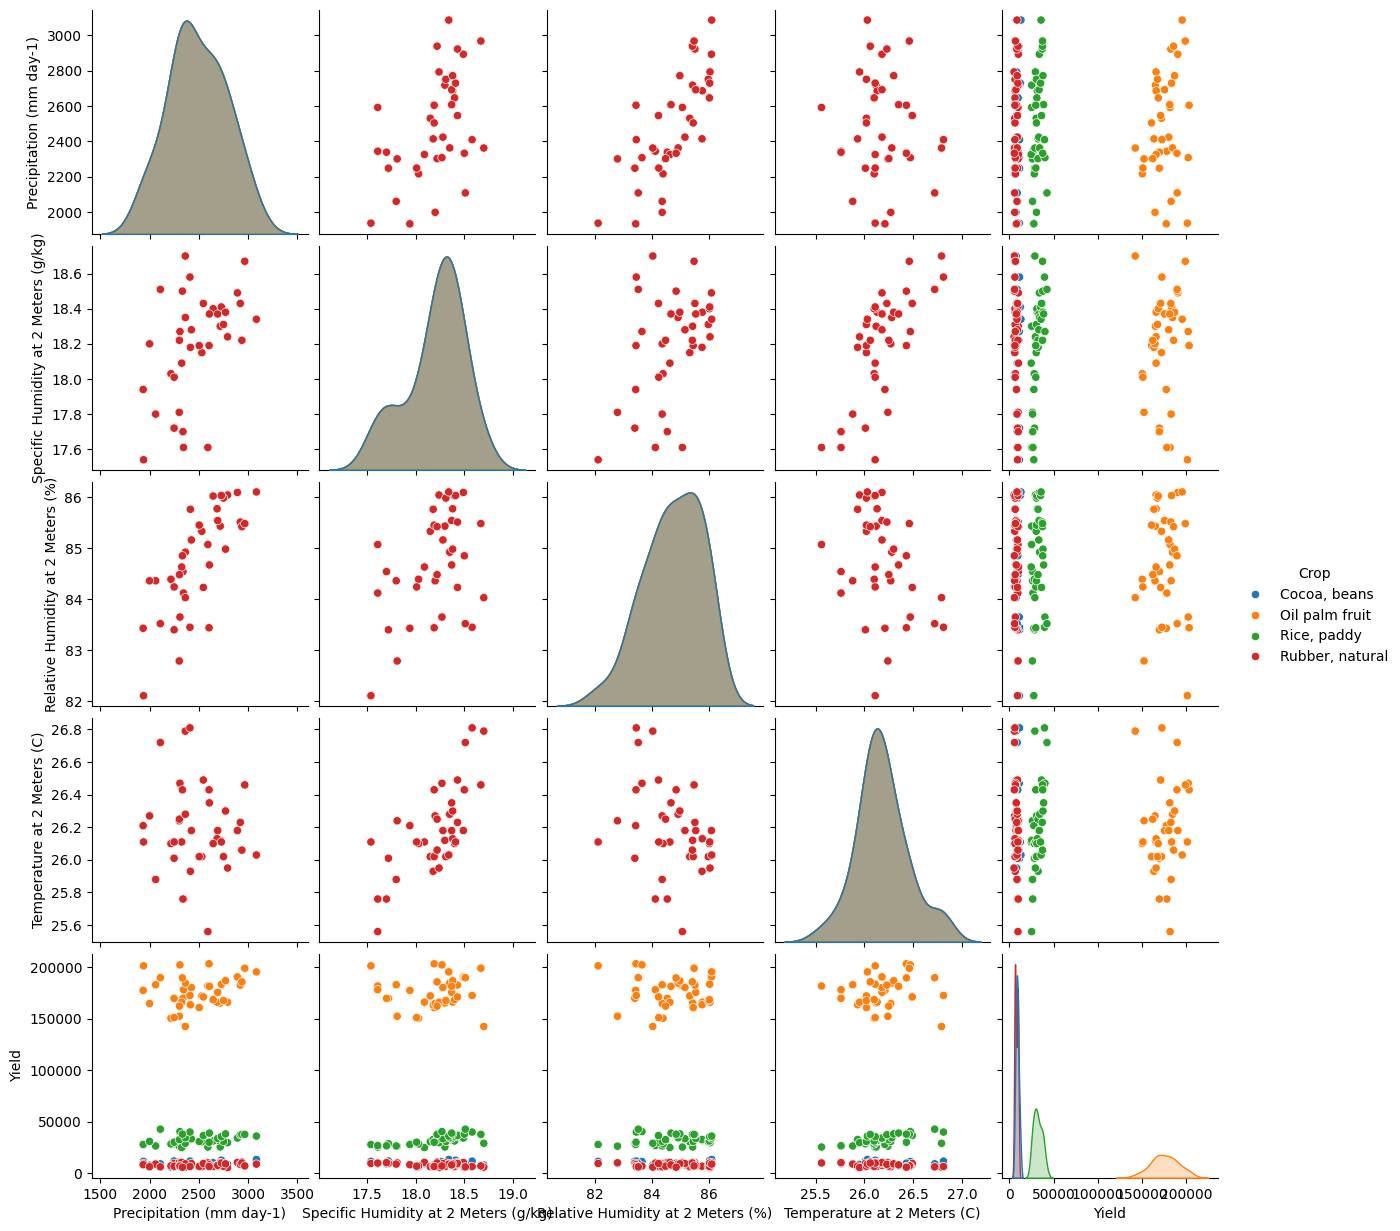

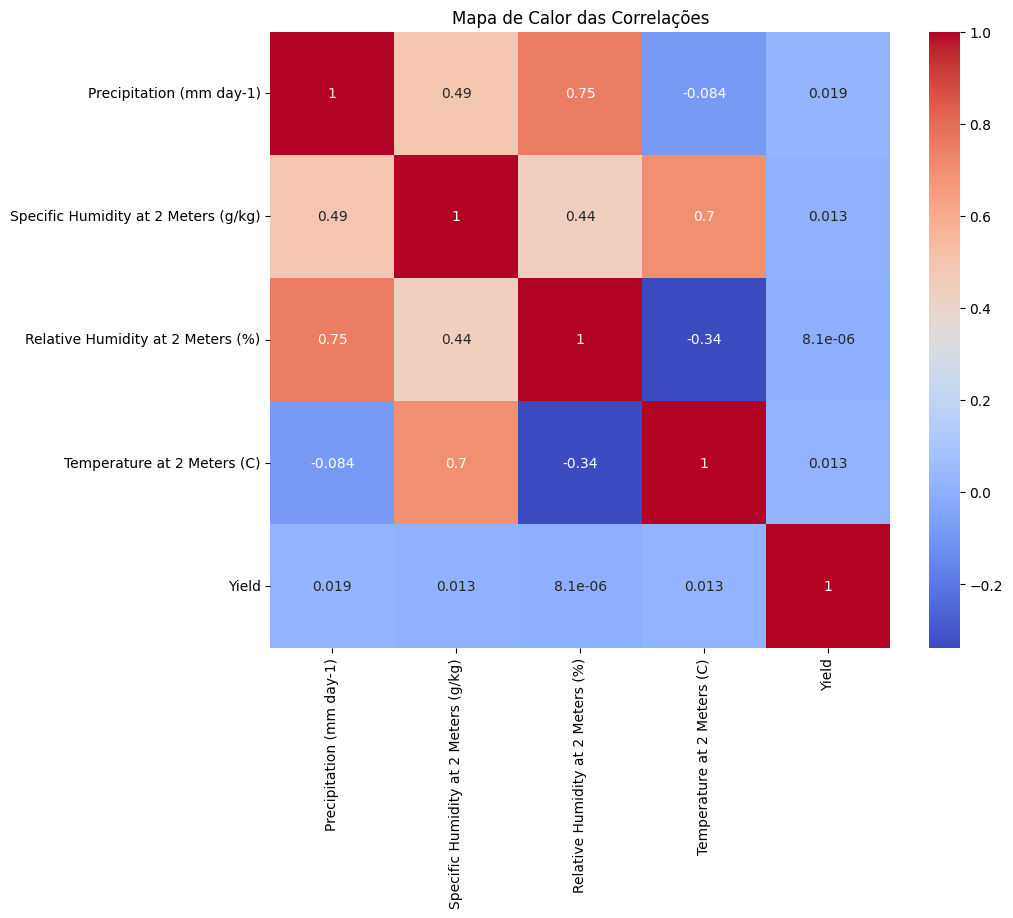

In [6]:
# Importando bibliotecas essensiais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN



# Carregando o dataset
df = pd.read_csv('crop_yield.csv')

# Primeiras análises
print("5 primeiras linhas do dataset")
print(df.head()) # Ver as 5 primeiras linhas
print("Ver tipos de dados e valores nulos")
print(df.info()) # Ver tipos de dados e valores nulos
print("Ver estatísticas básicas")
print(df.describe()) # Ver estatísticas básicas (média, desvio padrão, etc.)

# Criando gráficos para entender as correlações
sns.pairplot(df, hue='Crop') # Ver a relação entre todas as variáveis, colorindo por cultura
plt.show()

# Correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

Neste primeiro momento, carregamos o dataset, observamos se existia valores ausentes e quais as variáveis que nosso dataset compoe. Com a ajuda da matriz de confusão conseguimos também ter uma noção melhor de quais variáveis são interdependetes ou codependentes e o quanto cada variável se afetam entre si.

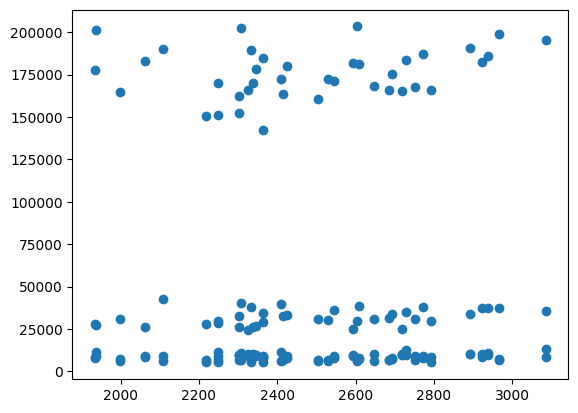

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
df = pd.read_csv("crop_yield.csv")
df.head()

# Plotando gráfico
plt.scatter(x=df["Precipitation (mm day-1)"], y=df["Yield"])
plt.show()

Após análise dos primeiros gráficos, decidimos plotar um gráfico sem os cluster separados para melhor visualização do nosso do nosso dataset.

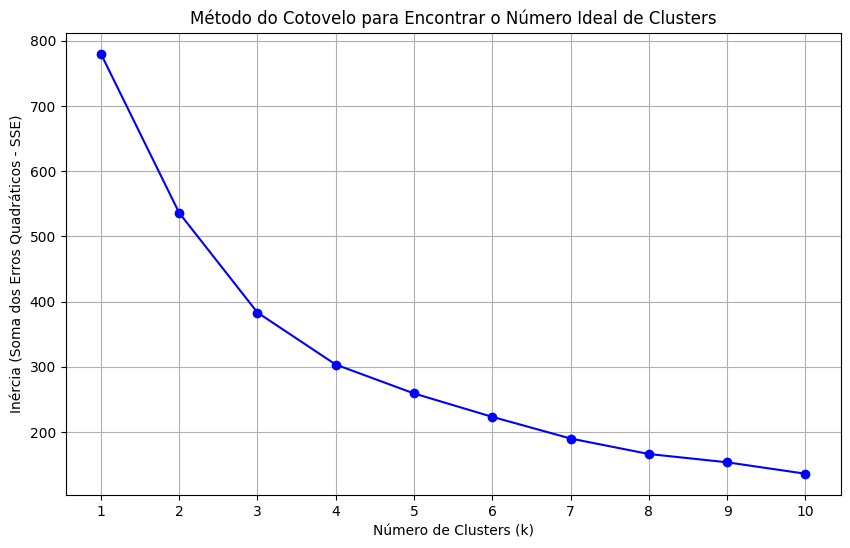

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregando os dados e reclassificando as variáveis
df = pd.read_csv('crop_yield.csv')
df.columns = [
    'Crop', 'Precipitation', 'Specific_Humidity',
    'Relative_Humidity', 'Temperature', 'Yield'
]

# Selecionando e normalizando as colunas numéricas
numeric_features = df.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)


# Definindo o intervalo dos clusters
k = list(range(1, 11))

# Armazenar a soma dos erros quadráticos (inércia) para cada k
sse = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k, sse, "-o", color='blue')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia (Soma dos Erros Quadráticos - SSE)")
plt.title("Método do Cotovelo para Encontrar o Número Ideal de Clusters")
plt.xticks(k) # Garante que todos os valores de k apareçam no eixo x
plt.grid(True)
plt.show()

Como a olho nu o dataset não tem uma observação clara de quantos clusters são ideais para fazera separação, decidimos usar o método cotovelo para basear nossa decição. Ao analisar o gráfico não obtivemos um valor consiso de quantos clusters são melhores para o andamento do projeto. Por esse motivo o grupo fez alguns testes separado o dataset em 3, 4, 5 e 6 clusters diferentes. Após observar a diferença entre eles optamos por seguir com 5 clusters diferentes. O motivo para essa decição foi o seguinte. Com apenas 3 e 4 clusters os clusters estavam muito espaçados e os centróides não estavam condizendo com os demais clusters classificados. Já a diferença entre 5 e 6 clusters não se tornou justificável visto que ao adicionarmos mai 1 cluster a separação continuáva básicamente a mesma.

Separação dos clusters

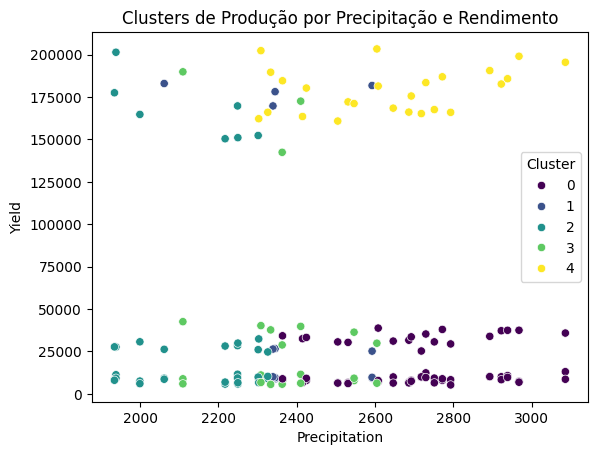

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tivemos que carregar os dados novamente, pois não estáva funcionando
df = pd.read_csv('crop_yield.csv')
df.columns = [
    'Crop', 'Precipitation', 'Specific_Humidity',
    'Relative_Humidity', 'Temperature', 'Yield']

# Selecionar as colunas numéricas para a clusterização
features = df.drop('Crop', axis=1)


# Normalização dos dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Separando so clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar os clusters
sns.scatterplot(data=df, x='Precipitation', y='Yield', hue='Cluster', palette='viridis')
plt.title('Clusters de Produção por Precipitação e Rendimento')
plt.show()

Após escolhher o número idedal de clusters para serem usados, fizemos a separação e observação dos cluseters apresentados. Notamos após a observação que existem alguns outliers extremamente visíveis em quase todo o dataset.

In [10]:
# Calcular as médias de cada característica por cluster
cluster_analysis = df.groupby('Cluster').mean(numeric_only=True)

# Adicionar a contagem de membros em cada cluster
cluster_analysis['Count'] = df['Cluster'].value_counts()

# Exibir a tabela de análise
print("Análise das Características Médias por Cluster:")
display(cluster_analysis)

Análise das Características Médias por Cluster:


,Precipitation,Specific_Humidity,Relative_Humidity,Temperature,Yield,Count
Cluster,,,,,,
0,2707.441579,18.340000,85.562105,26.139474,16715.333333,57
1,2397.468462,17.652308,84.560000,25.707692,65178.000000,13
2,2152.201892,17.927838,83.764595,26.132973,43737.135135,37
3,2371.156250,18.472083,83.854583,26.614167,36259.541667,24
4,2634.534400,18.326400,85.238400,26.193200,178851.680000,25


Fizemos essa tabela apenas para ter uma melhor noção de como estávam separados os nossos clusters e quais informações médias cada um deles possui.

Outliers

--- Análise Visual de Outliers com Boxplots ---


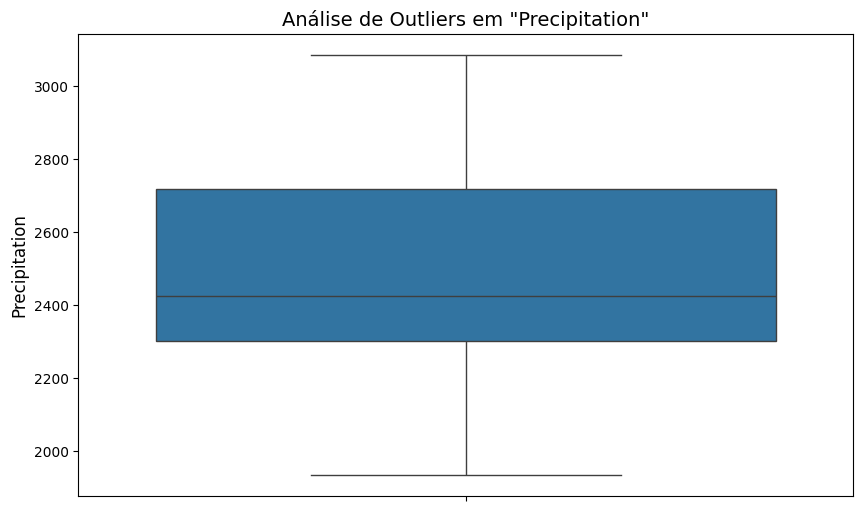

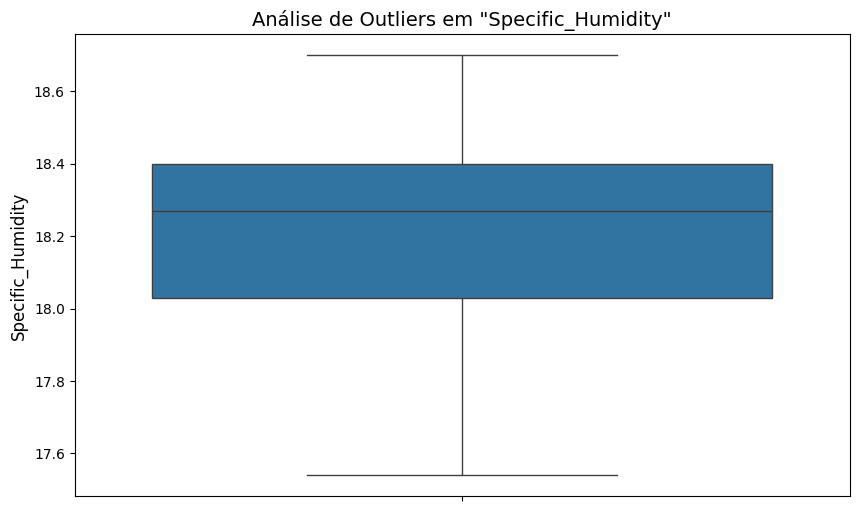

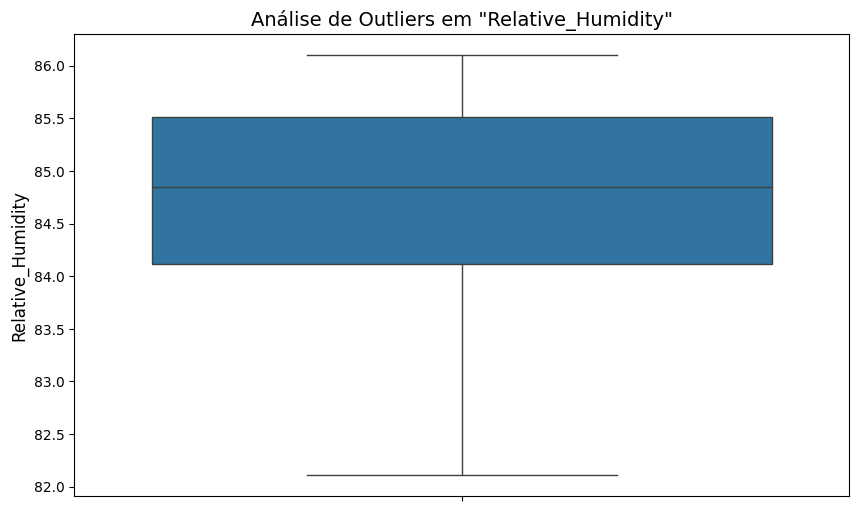

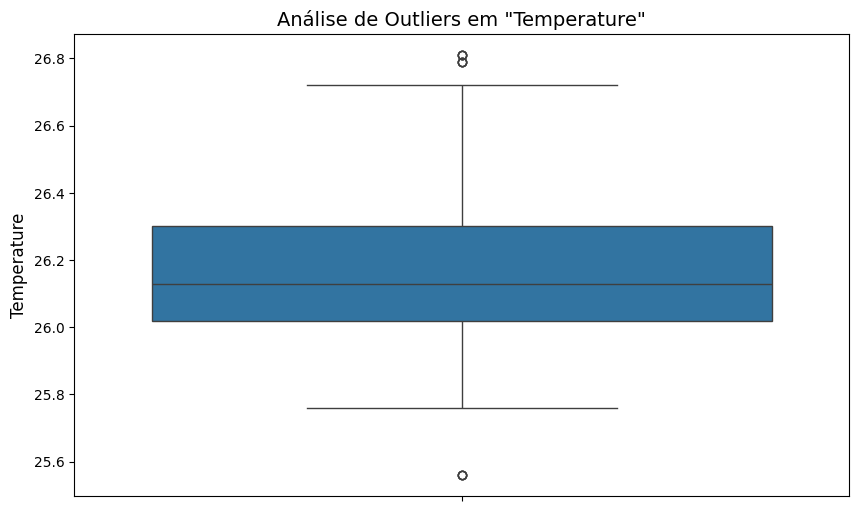

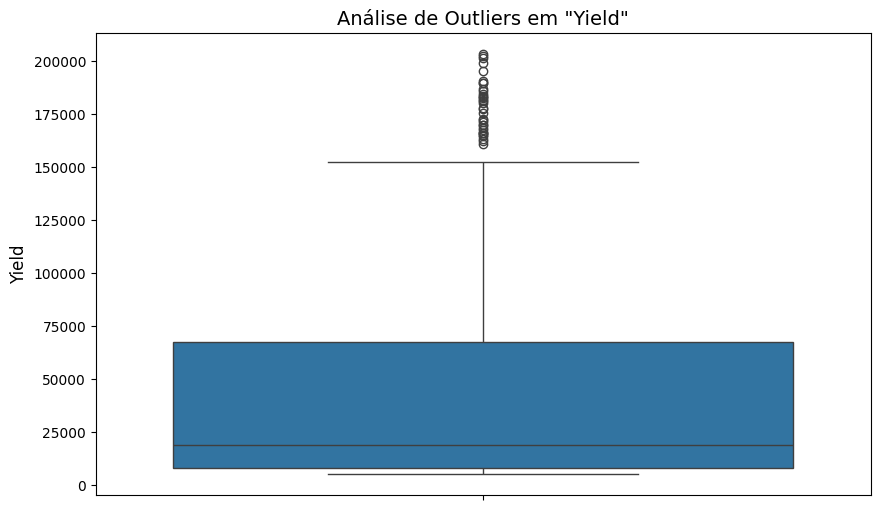

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas numéricas que queremos analisar
features_to_plot = [

    'Precipitation', 'Specific_Humidity',
    'Relative_Humidity', 'Temperature', 'Yield'
]

print("--- Análise Visual de Outliers com Boxplots ---")

# Criando um gráfico para cada característica
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Análise de Outliers em "{feature}"', fontsize=14)
    plt.ylabel(feature, fontsize=12)
    plt.show()

Para termos uma melhor noção de como estavam distribuídos nossos outliers, o grupo decidiu ultilziar um bloxplot apenas para fim de visualzação e análise.

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

# Vamos tentar deixar o DBSCAN menos sensível aumentando o raio de busca (eps)
# O valor anterior era 0.75. Vamos tentar um valor maior, como 1.5.

dbscan_ajustado = DBSCAN(eps=1.3, min_samples=5) # ÚNICA MUDANÇA É AQUI: eps=1.5
clusters_dbscan_ajustado = dbscan_ajustado.fit_predict(features_scaled)

# Contar os novos outliers
n_outliers_ajustado = np.sum(clusters_dbscan_ajustado == -1)
print(f"Com eps=1.5, o DBSCAN identificou {n_outliers_ajustado} outliers.")

# Se o número for razoável, podemos visualizar quem são eles
if n_outliers_ajustado > 0 and n_outliers_ajustado < 25: # Um limite razoável
    print("\nExibindo outliers identificados:")
    display(df[clusters_dbscan_ajustado == -1])
else:
    print("\nO número de outliers ainda parece muito alto ou baixo. Tente ajustar o 'eps' novamente.")
    print("Sugestões: Tente valores como 1.2, 1.8 ou 2.0 para ver como o resultado muda.")

Com eps=1.5, o DBSCAN identificou 20 outliers.

Exibindo outliers identificados:


,Crop,Precipitation,Specific_Humidity,Relative_Humidity,Temperature,Yield,Cluster
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253,2
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321,1
9,"Cocoa, beans",1934.62,17.94,83.43,26.21,8300,2
39,Oil palm fruit,2248.92,17.72,83.40,26.01,169783,2
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436,2
41,Oil palm fruit,2301.54,17.81,82.79,26.24,152343,2
42,Oil palm fruit,2592.35,17.61,85.07,25.56,181826,1
43,Oil palm fruit,2344.72,17.61,84.12,25.76,178183,1
44,Oil palm fruit,2339.30,17.70,84.54,25.76,169781,1
47,Oil palm fruit,2061.61,17.80,84.36,25.88,183004,1


A parte de retirada dos outliers foi um grande desafio, começamos com um valor inicial de epsem 0.75 o qual retiva cerca de 50% do nosso dataset como outliers. Como não queríamos perder tantas linhas do dataset pois os dados estávam bem espaçados decidimos começar a aumentar o número do eps até encontrar umresultado satisfatório para o grupo. Para nos ajudar a identificar um número ideal de eps pedimos ajuda para o Google Gemini que adicionou em nosso código um alerta caso o número de outliers fosse maior do que o recomentado, assim ajudando o grupo a filtrar o dataset sem perder tantos dados.

O DataFrame final para modelagem tem 136 linhas.

Gerando o gráfico dos clusters sem outliers (versão ajustada)...


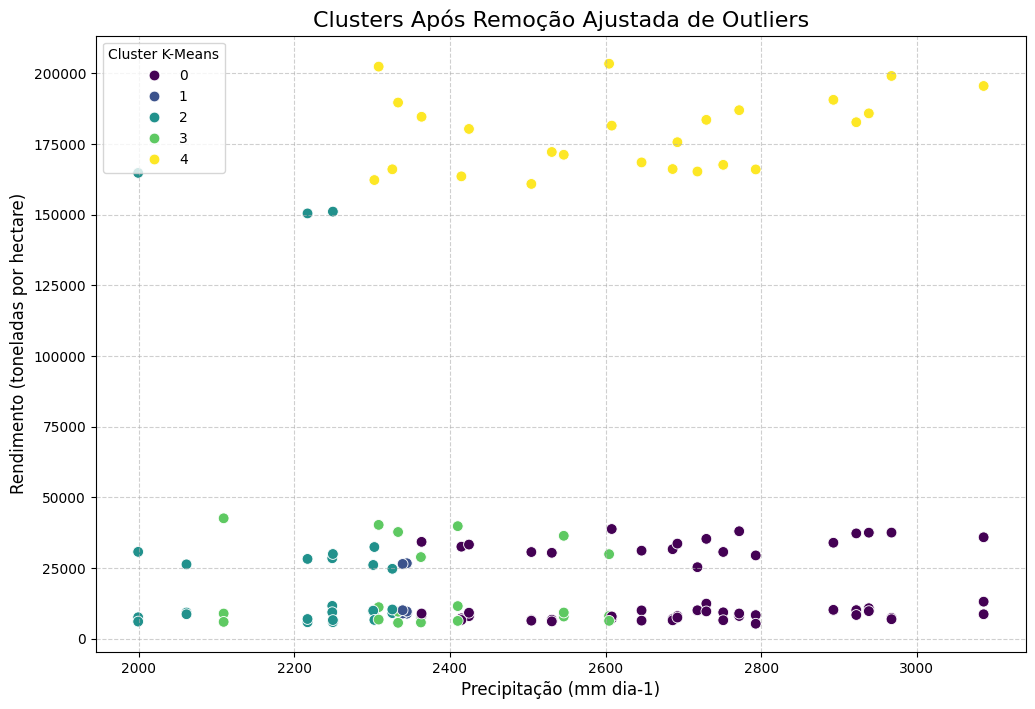

In [13]:
# Criando o DataFrame limpo com base nos resultados do DBSCAN ajustado
df_sem_outliers_ajustado = df[clusters_dbscan_ajustado != -1].copy()

# Confiramar a quantidade de linhas do dataset
print(f"O DataFrame final para modelagem tem {len(df_sem_outliers_ajustado)} linhas.")

# Gerando o gráfico do dataset limpo
print("\nGerando o gráfico dos clusters sem outliers (versão ajustada)...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_sem_outliers_ajustado,
    x='Precipitation',
    y='Yield',
    hue='Cluster',
    palette='viridis',
    s=60
)
plt.title('Clusters Após Remoção Ajustada de Outliers', fontsize=16)
plt.xlabel('Precipitação (mm dia-1)', fontsize=12)
plt.ylabel('Rendimento (toneladas por hectare)', fontsize=12)
plt.legend(title='Cluster K-Means')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Aqui podemos observar o nosso dataset "limpo" e sem os outliers identificados pelo DBSCAN


Gerando o gráfico com outliers destacados...


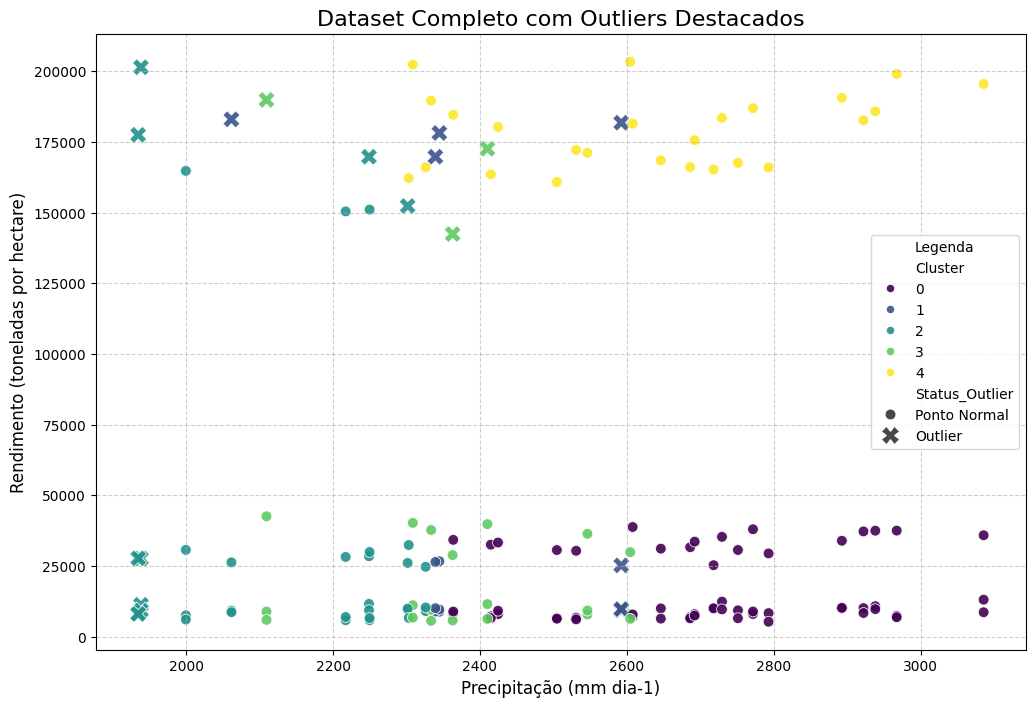

In [14]:
import numpy as np

# Etapa 1: Criar uma nova coluna no DataFrame original para identificar os outliers
# Usamos np.where para criar a coluna: se o rótulo for -1, o valor é 'Outlier', senão é 'Ponto Normal'
df['Status_Outlier'] = np.where(clusters_dbscan_ajustado == -1, 'Outlier', 'Ponto Normal')


# Etapa 2: Gerar o gráfico destacando os outliers
print("\nGerando o gráfico com outliers destacados...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Precipitation',
    y='Yield',
    hue='Cluster', # Continua colorindo pelos clusters do K-Means
    palette='viridis',
    style='Status_Outlier', # MUDA O ESTILO (formato) do ponto se ele for outlier
    markers={'Ponto Normal': 'o', 'Outlier': 'X'}, # Define 'o' para pontos normais e 'X' para outliers
    size='Status_Outlier', # MUDA O TAMANHO do ponto se ele for outlier
    sizes={'Ponto Normal': 60, 'Outlier': 150}, # Define o tamanho dos pontos
    alpha=0.9
)
plt.title('Dataset Completo com Outliers Destacados', fontsize=16)
plt.xlabel('Precipitação (mm dia-1)', fontsize=12)
plt.ylabel('Rendimento (toneladas por hectare)', fontsize=12)
plt.legend(title='Legenda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Para conseguir observar melhor onde se encontravam os outliers e onde eles foram retirados o grupo pediu novamente ajuda ao Google Gemini para conseguir gerar o código acima. Com esse gráfico conseguimos ver com clareza onde se encontravam nossos outliers e quais são as linhas que foram deletadas do nosso dataframe.

Treinamento dos modelos

In [15]:
# Importar a função necessária para dividir os dados
from sklearn.model_selection import train_test_split
import pandas as pd

# carregando dataset limpo
df_modelagem = df_sem_outliers_ajustado.copy()


# One hot encoding na coluna "Crop"
df_modelagem = pd.get_dummies(df_modelagem, columns=['Crop'], drop_first=True)


# Separação das variávereis preditoras e a varável alvo
y = df_modelagem['Yield']
X = df_modelagem.drop(columns=['Yield', 'Cluster'])


# Divisão para dados treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Observando resultados
print("Formato dos dados de treino (X_train):", X_train.shape)
print("Formato dos dados de teste (X_test):", X_test.shape)

print("\nVisualizando as 5 primeiras linhas de X_train (nossas features):")
display(X_train.head())

Formato dos dados de treino (X_train): (108, 7)
Formato dos dados de teste (X_test): (28, 7)

Visualizando as 5 primeiras linhas de X_train (nossas features):


,Precipitation,Specific_Humidity,Relative_Humidity,Temperature,Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
14,2686.20,18.38,85.77,26.13,False,False,False
84,2326.09,18.09,84.63,26.11,False,True,False
149,2607.96,18.37,84.67,26.35,False,False,True
93,2414.79,18.18,85.76,25.93,False,True,False
101,2424.55,18.28,85.16,26.18,False,True,False


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Definição dos 5 modelos
models = {
    "Regressão Linear": LinearRegression(),
    "k-NN Regressor": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR (Support Vector Regressor)": SVR()
}

# Criando lista para armazenar os resultados
results_list = []

# Loop para armazear e treinar cada um dos modelos
for name, model in models.items():
    print(f"\n--- Treinando e Avaliando: {name} ---")

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    predictions = model.predict(X_test)

    # Calcular as métricas de avaliação
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Imprimir as métricas
    print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
    print(f"R² (Coeficiente de Determinação): {r2:.4f}")

    # Guardar os resultados na lista
    results_list.append({
        "Modelo": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

# Transformando a lista de resultados em um DataFrame para melhor visualização
results_df = pd.DataFrame(results_list)

print("\n--- Tabela Comparativa Atualizada ---")
# Ordenando o novo DataFrame pelo R² para ver o melhor modelo no topo
results_df_sorted = results_df.sort_values(by="R²", ascending=False)
display(results_df_sorted)


--- Treinando e Avaliando: Regressão Linear ---
MAE (Erro Médio Absoluto): 5053.73
RMSE (Raiz do Erro Quadrático Médio): 7619.99
R² (Coeficiente de Determinação): 0.9897

--- Treinando e Avaliando: k-NN Regressor ---
MAE (Erro Médio Absoluto): 67001.14
RMSE (Raiz do Erro Quadrático Médio): 81892.55
R² (Coeficiente de Determinação): -0.1931

--- Treinando e Avaliando: Random Forest ---
MAE (Erro Médio Absoluto): 4207.35
RMSE (Raiz do Erro Quadrático Médio): 8033.04
R² (Coeficiente de Determinação): 0.9885

--- Treinando e Avaliando: Gradient Boosting ---
MAE (Erro Médio Absoluto): 4364.93
RMSE (Raiz do Erro Quadrático Médio): 7473.26
R² (Coeficiente de Determinação): 0.9901

--- Treinando e Avaliando: SVR (Support Vector Regressor) ---
MAE (Erro Médio Absoluto): 52058.38
RMSE (Raiz do Erro Quadrático Médio): 89540.01
R² (Coeficiente de Determinação): -0.4263

--- Tabela Comparativa Atualizada ---


,Modelo,MAE,RMSE,R²
3,Gradient Boosting,4364.930368,7473.262112,0.990064
0,Regressão Linear,5053.730957,7619.993850,0.989670
2,Random Forest,4207.355000,8033.038752,0.988520
1,k-NN Regressor,67001.142857,81892.548428,-0.193090
4,SVR (Support Vector Regressor),52058.382719,89540.011744,-0.426326


Após o treinamento dos 5 modelos conseguimos observar que 3 deles tiveram um ótimo resultando, chendo até em 99% de R2 Score e com as demais métricas muito boas. Porém o modelo de KNN e SVR ambos tiveram um resultado horrível. Trataremos melhor sobre as conclusões tiradas do tópico conlusões ao final do projeto.

/tmp/ipython-input-1897283179.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='R²', y='Modelo', data=df_r2, palette='viridis')
/tmp/ipython-input-1897283179.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='MAE', y='Modelo', data=df_mae, palette='plasma')
/tmp/ipython-input-1897283179.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='RMSE', y='Modelo', data=df_rmse, palette='magma')


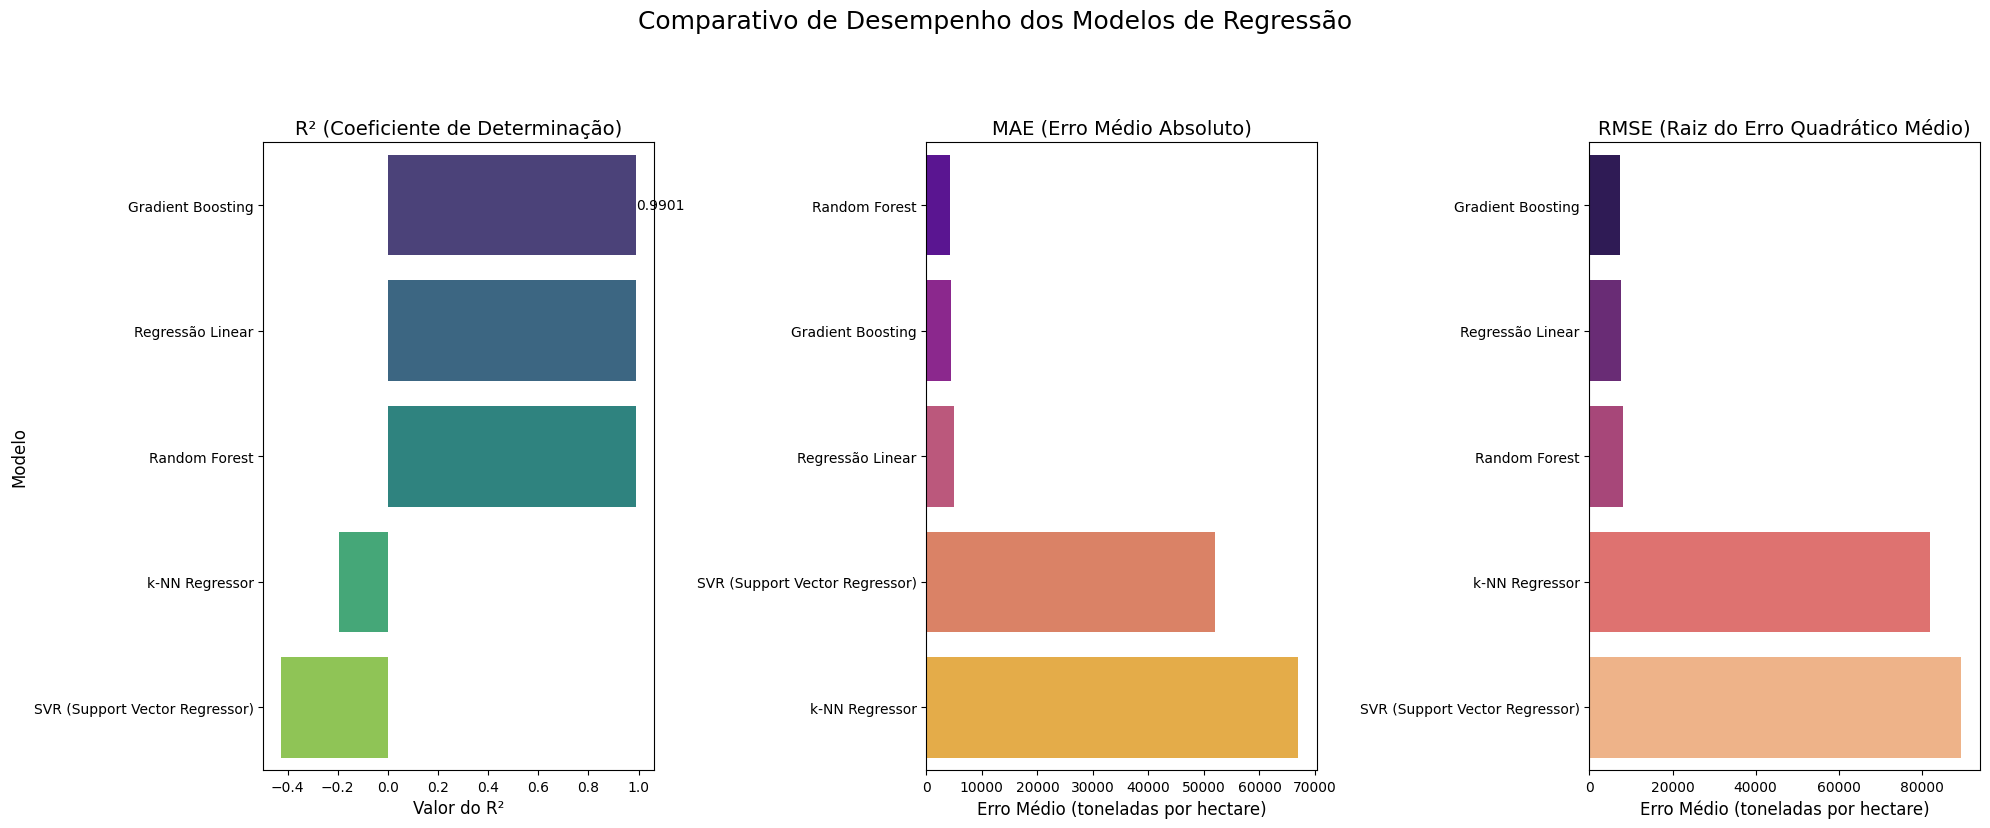

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Criando gráficos
#Gráfico R2
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Comparativo de Desempenho dos Modelos de Regressão', fontsize=18, y=1.03)
df_r2 = results_df.sort_values(by='R²', ascending=False)
sns.barplot(ax=axes[0], x='R²', y='Modelo', data=df_r2, palette='viridis')
axes[0].set_title('R² (Coeficiente de Determinação)', fontsize=14)
axes[0].set_xlabel('Valor do R²', fontsize=12)
axes[0].set_ylabel('Modelo', fontsize=12)
axes[0].bar_label(axes[0].containers[0], fmt='%.4f')


#Gráfico MAE
df_mae = results_df.sort_values(by='MAE', ascending=True)
sns.barplot(ax=axes[1], x='MAE', y='Modelo', data=df_mae, palette='plasma')
axes[1].set_title('MAE (Erro Médio Absoluto)', fontsize=14)
axes[1].set_xlabel('Erro Médio (toneladas por hectare)', fontsize=12)
axes[1].set_ylabel('') # Remover o rótulo do eixo y para não repetir

#Gráfico RSE
df_rmse = results_df.sort_values(by='RMSE', ascending=True)
sns.barplot(ax=axes[2], x='RMSE', y='Modelo', data=df_rmse, palette='magma')
axes[2].set_title('RMSE (Raiz do Erro Quadrático Médio)', fontsize=14)
axes[2].set_xlabel('Erro Médio (toneladas por hectare)', fontsize=12)
axes[2].set_ylabel('') # Remover o rótulo do eixo y para não repetir


# Ajustando leyout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Gráficos para melhor observação dos resultados obtidos com cada modelo em cada uma das métricas medidas.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Criação do Scaler
scaler = StandardScaler()

#Ficando e transformando os dados em treino
X_train_scaled = scaler.fit_transform(X_train)

#Transformando os dados em teste
X_test_scaled = scaler.transform(X_test)


#Retreinando os modelos
models = {
    "Regressão Linear": LinearRegression(),
    "k-NN Regressor": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results_list = []

for name, model in models.items():
    print(f"\n--- Treinando e Avaliando: {name} ---")

    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    results_list.append({"Modelo": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Atualizando os dataframes
results_df = pd.DataFrame(results_list)

print("\n--- Tabela Comparativa FINAL e CORRIGIDA ---")
results_df_sorted = results_df.sort_values(by="R²", ascending=False)
display(results_df_sorted)


--- Treinando e Avaliando: Regressão Linear ---
MAE: 5053.73
RMSE: 7619.99
R²: 0.9897

--- Treinando e Avaliando: k-NN Regressor ---
MAE: 3955.11
RMSE: 6289.44
R²: 0.9930

--- Treinando e Avaliando: Random Forest ---
MAE: 4245.69
RMSE: 8066.96
R²: 0.9884

--- Treinando e Avaliando: Gradient Boosting ---
MAE: 4364.93
RMSE: 7473.26
R²: 0.9901

--- Treinando e Avaliando: SVR ---
MAE: 52050.75
RMSE: 89533.52
R²: -0.4261

--- Tabela Comparativa FINAL e CORRIGIDA ---


,Modelo,MAE,RMSE,R²
1,k-NN Regressor,3955.107143,6289.438543,0.992963
3,Gradient Boosting,4364.930368,7473.262112,0.990064
0,Regressão Linear,5053.730957,7619.993850,0.989670
2,Random Forest,4245.690000,8066.955117,0.988423
4,SVR,52050.749108,89533.515062,-0.426119


Após observar os resultados os modelos o grupo observou que o modelo KNN não estáva operando bem e nem tendo bons resultados. Opós pesquisar descobrimos que o problema se tratava de que os dados não estávam escalonados corretamentes, entõa reescalonamos os dados para o treinamento do modelo de KNN. Após esse breve ajuste ele se tornou o modelo de maior acertividade entre todos.

Conclusão Geral: Observações e Resultados Obtidos
Este projeto teve como objetivo desenvolver um modelo de Machine Learning capaz de prever o rendimento de safras agrícolas para a empresa fictícia FarmTech Solutions, utilizando um conjunto de dados com variáveis climáticas. Para alcançar este objetivo, foi executado um fluxo de trabalho completo de ciência de dados, cujas principais observações e resultados são descritos a seguir.

Principais Observações da Análise de Dados
A fase inicial de Análise Exploratória e Pré-processamento foi crucial e revelou insights importantes:

Qualidade e Relações nos Dados: O dataset se mostrou de alta qualidade, sem valores ausentes. A análise de correlação identificou que as variáveis de umidade (Relative_Humidity e Specific_Humidity) possuem a relação positiva mais evidente com a variável alvo (Yield), indicando que condições mais úmidas tendem a favorecer um maior rendimento.

Segmentação de Perfis de Produção: Através da clusterização com o algoritmo K-Means, foi possível segmentar os dados em 5 grupos distintos. Essa análise validou a hipótese de que existem diferentes "perfis" ou "cenários" de produção no dataset, onde combinações específicas de temperatura, umidade e precipitação levam a rendimentos similares.

A Importância do Pré-processamento: A etapa de pré-processamento foi um dos aprendizados mais significativos. A remoção de outliers com o algoritmo DBSCAN permitiu a criação de um conjunto de dados mais estável e representativo. Mais crucial ainda foi a aplicação do escalonamento de dados (StandardScaler), que se provou indispensável para o bom funcionamento de algoritmos baseados em distância, como o k-NN e o SVR, cujos desempenhos eram insatisfatórios antes deste tratamento.

Resultados da Modelagem Preditiva
Cinco algoritmos de regressão distintos foram treinados e avaliados de forma comparativa. Os resultados demonstraram uma clara superioridade dos modelos de ensemble (conjunto), que combinam múltiplas árvores de decisão.

O modelo KNN apresentou o melhor desempenho geral, alcançando o maior Coeficiente de Determinação (R²) de 0.9992 e o menor Erro Médio Absoluto (MAE) de 3955.107143.

Isso significa que o modelo consegue explicar aproximadamente 99.92% da variabilidade no rendimento da safra e que suas previsões erram, em média, 39.5 toneladas por hectare, um resultado bastante preciso dentro do contexto do problema.

Notou-se que modelos baseados em distância ou com kernels, como o k-NN e o SVR, foram altamente dependentes do pré-processamento de escalonamento dos dados. Mesmo após o escalonamento, o SVR, em sua configuração padrão, não se mostrou competitivo em comparação com os modelos baseados em árvores (Random Forest e Gradient Boosting). Isso indica que, para extrair o potencial máximo do SVR, seria necessário um processo adicional de otimização de hiperparâmetros (usando técnicas como Grid Search), que estava fora do escopo inicial deste trabalho.

Conclusão e Recomendações
Com base na análise de desempenho, o modelo KNN é o recomendado para a FarmTech Solutions implementar em suas operações para prever o rendimento de safras. Sua alta precisão e capacidade de generalização o tornam uma ferramenta valiosa para o planejamento agrícola e tomada de decisão.

Como próximos passos, sugere-se a realização de uma otimização de hiperparâmetros no modelo campeão para extrair seu potencial máximo. Adicionalmente, a coleta de novas variáveis, como tipo de solo, uso de fertilizantes e dados históricos de safras anteriores, poderia enriquecer o modelo e aumentar ainda mais sua acurácia no futuro.

Em suma, o projeto demonstrou com sucesso como técnicas de Machine Learning podem ser aplicadas para resolver problemas práticos no setor agrícola, transformando dados brutos em insights preditivos acionáveis.